In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [5]:
Y = data['affair']

In [131]:
model = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
model.fit(X_train, Y_train)
predictions_prob = model.predict_proba(X_test)

# ROC-curve 

## Без использования встроенного метода

Массив пороговых значений

In [132]:
THRES = np.linspace(0.05, 0.95, 100)

Расчет элементов матрицы ошибок для разных пороговых значений 

In [133]:
TP = []
FP = []
TN = []
FN = []

for thres in THRES:
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for prediction_prob, actual in zip(predictions_prob[:, 1], Y_test):
        if prediction_prob > thres:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        else:
            if actual == 0:
                tn += 1
            else:
                fn += 1
    TP.append(tp)
    FP.append(fp)
    TN.append(tn)
    FN.append(fn)

In [134]:
TP = np.array(TP)
FP = np.array(FP)
TN = np.array(TN)
FN = np.array(FN)

Расчет TPR и FPR

In [135]:
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

## С использованием встроенных методов

In [136]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve( Y_test, predictions_prob[:, 1] )

## Сравнение графиков 

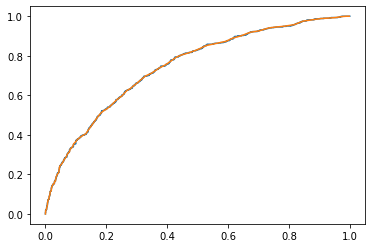

In [137]:
plt.plot(fpr, tpr)
plt.plot(FPR, TPR)

=> графики совпадают

# PR curve

In [140]:
PR = TP / (TP + FP)
REC = TPR

<ipython-input-140-b516b8b3380f>:1: RuntimeWarning: invalid value encountered in true_divide
  PR = TP / (TP + FP)


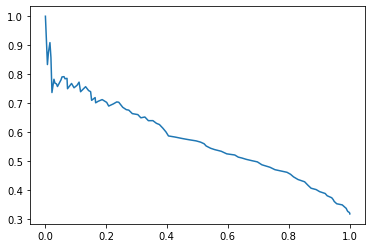

In [142]:
plt.plot(REC, PR)

In [147]:
from sklearn.metrics import average_precision_score
average_precision_score(Y_test, predictions_prob[:,1])

0.5761329928884336